# Linear Regression (Supervised Learning)

<table border="1" cellpadding="3" id="printTable">
    <tbody> 
    <tr>
        <th>Author</th>
        <th>Email</th>
        <th>Website</th>
    </tr>
    <tr>
        <td>Siddartha Nath</td>
        <td>
            <a href="mailto:sidnath01@hotmail.com">sidnath01@hotmail.com
            </a>
        </td>
        <td>PolyNath</td>
    </tr>
    </tbody>
</table>

The purpose of this notebook is to demonstrate and explore properties of Linear Regression through computational Mathematics. 

## Library Packages

As stated in the GitHub repository, <a href="https://github.com/siddarthanath/Data-Science-2021">Data-Science-2021</a>, we will focus solely on "from scratch" implementations and thus will not be using in-built high-level packages such as statsmodels, scikit-learn etc... 
At the end, we will cross reference these implementations with in-built packages.
<br>
Even though practically this is not the most efficient, it will allow you to fully understand to how the background of these topic. 

We will discuss the how's of these tasks but not dive into the why's. If there is a demand for in-depth analysis into the Mathematics behind the code, then an online course will be created side-by-side the notebooks for this. 

In [1]:
# Used for manipulating data
import pandas as pd
# Scientific and vector computation for python
import numpy as np
# Plotting library
import matplotlib.pyplot as plt 
# Load scikit-learn for late use (and also for datasets)
import sklearn 
# Keep plots inline
%matplotlib inline

## Background

In every dataset, we have a set of inputs and a corresponding output. We classify this input space by: $x^{i} \in X$ and output space by: $y^{i} \in Y$.

- Typically, our datasets are not always numbers i.e. they could be names of places, companies or gender. Additionally, our outputs $y^{i}$ can be continuous or discrete/categorical i.e. a number, a group or Yes/No. 
- The linear regression problem is a supervised learning problem as we feed our machine training examples e.g. ($x^{i},y^{i}$), and then hope that the machines learns from the labelled data to create a model which can be then used to predict outcomes based on a given unknown datapoint $x^{i}$.  
<br>

**Note:** $(x^{i},y^{i})$ is not to be confused with power lower/indices. 
<br>

In order to create our machine learning model, we first need to organise our dataset. There are two ways this can be done:
- Matrix vector form (this is standard procedure as it reduces computational complexity and thus will be used for the remaining notebooks).
- Non-matrix vector form.
<br>

Once the dataset is obtained, we either:
- Split the dataset into training and test examples (typically 70:30 ratio); here the model will learn the data on the training examples and its' errors and accuracies will be predominantly noted by the test examples.
- Split the dataset into training, validation and test examples (typically 50:30:20); here the model will learn the data on the training example and will be continually improved/tuned by testing it on the validation examples. Once this process is complete, the final model will be used on the test examples to examine its' performance. 
- Use the entire dataset to test on and then keep this model.

For this notebook, we will go with the last option (as this is fastest however is probably less reliable). In this later notebooks we will see when/how to split the data and why this is necessary in some machine learning tasks.

## Mathematical Theory

### 1.

For this topic, we are looking at linear regression. The reason this is called 'linear' regression is not because it is in the form $y = mx + c$ but because the $\theta_{N}$ are linear combinations in $x$ i.e. $y = \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2}$ is linear but $y = \theta_{0} + \theta_{1}x_{1}^{\theta_{2}}$ is not.

In general, the data we have will look like:

$$\{x_{1}^{i}, x_{2}^{i}, \dots, x_{p}^{i}, y^{i}\}_{i=1}^N$$

- $p$ = # of features in the dataset 
- $N$ = # of training inputs. 

### 2.

For every data point $x^{i}$, we will have a corresponding *observation value*. Conventionally, we write the following:

\begin{gather}
    \underline{\boldsymbol y} = 
\begin{bmatrix}
  y^1 \\ y^2 \\ \dots \\ y^N 
\end{bmatrix}
=
\begin{bmatrix}
f(\boldsymbol x^{1}, \underline{\boldsymbol \theta}) \\ f(\boldsymbol x^{2}, \underline{\boldsymbol \theta}) \\ \dots \\ f(\boldsymbol x^{N}, \underline{\boldsymbol \theta})
\end{bmatrix}
\in \mathbb{R}^N
\qquad \text{the outcome/target variable}
\end{gather}

where,

\begin{gather}
    \underline{\boldsymbol x^{i}} = 
\begin{bmatrix} 
x^{i}_{1} \\ x^{i}_{2} \\ \dots \\ x^{i}_{p}
\end{bmatrix}
\in \mathbb{R}^p;\ \forall i \in {1,...,N}
\qquad \text{a feature of the dataset}
\end{gather}

Since our aim is to construct a linear regression of $\boldsymbol{y}$, we can write the observed datapoints as:

$$y^{i} = f_{LR}(\boldsymbol x^{i}, \underline{\boldsymbol{\theta}})= \theta_{0} + \theta_{1}x_{1}^{i} \dots \theta_{p}x_{p}^{i}; \ \forall i= 1,...,N$$. 

**Note:** Python treats row vectors and column vectors the same in computation/dimensions (as they are $1D$ arrays). Hence, this notation is abitrary as we can easily just transpose the column vector and make it into a row vector and rewrite the definition of $\boldsymbol x^{i}$ i.e. it is by choice how you lay this out but you must make sure to stay consistent in terms of dimension compatibility. 

Here, the only unknowns are the $\underline{\boldsymbol{\theta}}$. Hence, our goal is to estimate $\underline{\boldsymbol{\theta}}$ i.e. calculate the estimates $\underline{\boldsymbol{\hat \theta}}$, which we call our **parameters** of the dataset. 

### 3.

For every data point, we will also have a *predicted value*. Similarly, we write the following:

\begin{gather}
    \underline{\hat{\boldsymbol y}} = 
\begin{bmatrix}
  \hat y^1 \\ \hat y^2 \\ \dots \\ \hat y^N 
\end{bmatrix}
=
\begin{bmatrix}
f(\boldsymbol x^{1}, \underline{\boldsymbol{\hat \theta}}) \\ f(\boldsymbol x^{2}, \underline{\boldsymbol{\hat \theta}}) \\ \dots \\ f(\boldsymbol x^{N}, \underline{\boldsymbol{\hat \theta}})
\end{bmatrix}
\in \mathbb{R}^N
\qquad \text{the predicted datapoints of $\boldsymbol{y}$}
\end{gather}

Since our aim is to construct a linear regression of $\boldsymbol{y}$, we can write the predicted datapoints as:

$$\hat y^{i} = f_{LR}(\boldsymbol x^{i}, \underline{\boldsymbol{\hat\theta}})= \hat \theta_{0} + \hat \theta_{1}x_{1}^{i} \dots \hat \theta_{p}x_{p}^{i}; \ \forall i= 1,...,N$$. 

### 4.

Combining all the previous notations, we will write the associated model in the following matrix/vectorised manner:
    
\begin{gather}
    \underline{\boldsymbol{y}}
    = \boldsymbol{\hat Y} =
\begin{bmatrix}
y^{1} \\ \ y^{2} \\ \dots \\  y^{N}
\end{bmatrix}
=
\begin{bmatrix}
f(\boldsymbol x^{1}, \underline{\boldsymbol{ \theta}}) \\ f(\boldsymbol x^{2}, \underline{\boldsymbol{\theta}}) \\ \dots \\ f(\boldsymbol x^{N}, \underline{\boldsymbol{ \theta}})
\end{bmatrix}
=
\begin{bmatrix}
\theta_{0} + \theta_{1}x_{1}^{1} \dots \theta_{p}x_{p}^{1} \\
\theta_{0} + \theta_{1}x_{1}^{2} \dots \theta_{p}x_{p}^{2} \\ \dots \\
\theta_{0} + \theta_{1}x_{1}^{N} \dots \theta_{p}x_{p}^{N}
\end{bmatrix}
=
\begin{bmatrix}
1 & x_{1}^{1} & x_{2}^{1} & \dots & x_{p}^{1} \\
1 & x_{1}^{2} & x_{2}^{2} & \dots & x_{p}^{2} \\
\dots  & \dots  & \dots  & \dots & \dots  \\
1 & x_{1}^{N} & x_{2}^{N} & \dots & x_{p}^{N} 
\end{bmatrix}
\begin{bmatrix}
\theta_0 \\  \theta_1 \\ \dots \\  \theta_p
\end{bmatrix}
= \boldsymbol X \underline{\boldsymbol{ \theta}} 
\end{gather}

where:
- $\boldsymbol{X} \in \mathbb{R}^{N \times (p+1)}$
- $\underline{\boldsymbol{ \theta}} \in \mathbb{R}^{p+1}$
- $\underline{\boldsymbol{ y}} \in \mathbb{R}^{N}$

**Implementation Note:** We store each example as a row in the the $X$ matrix. To take into account the intercept term ($\hat \theta_0$), we add an additional first column to $X$ and set it to all ones. This allows us to treat $\hat \theta_0$ as simply another 'feature'.

### 5.

Mathematically speaking, our estimated parameters $\hat \theta_{j}$ are learned/observed after the modelling. 

Overall, the process is as follows: 
- We will first be working with the data $\underline{\boldsymbol{y}}=\boldsymbol{X\underline{\theta}}$
- Once we solve this matrix multiplication problem, we will have calculated $\underline{\boldsymbol{\hat \theta}} = \{\hat \theta_{j}; \forall j \in \{1,\dots,p\}\}$ 
- We can then substitute all $\hat \theta_{j}'s$ back into $\underline{\boldsymbol{y}}=\boldsymbol{X\underline{\theta}}$  to give us $\underline{\boldsymbol{\hat y}} = \boldsymbol{X\underline{\hat \theta}}$

The last step is equivalent to finding the estimated parameters $\hat \theta_{p}$ via minimising the total error i.e. sum of the difference between predictions and observations, which is $\underline{\boldsymbol{y}}-\underline{\boldsymbol{\hat y}} := \underline{\boldsymbol{e}} $. 

## Visual Intuition

<img src="https://lh3.googleusercontent.com/proxy/4eRuJp-Kr01WRavXXljdt6eIuzuNPBy81MJdyVXYNTsnpICogRiq9fGvCDMcBZMsA4cFRrZfJVvl3NdsKXONkoF7WaAYa8lgwsPecZf4vIcy2s9AMeRE9qMqqVmeK2I_qDySxrnd5vNMfEP0Q9xbAcPg-KXmm36mgZw" width="500">
<div class="alert alert-success">
  <strong>Reference: <a href="https://lh3.googleusercontent.com/proxy/4eRuJp-Kr01WRavXXljdt6eIuzuNPBy81MJdyVXYNTsnpICogRiq9fGvCDMcBZMsA4cFRrZfJVvl3NdsKXONkoF7WaAYa8lgwsPecZf4vIcy2s9AMeRE9qMqqVmeK2I_qDySxrnd5vNMfEP0Q9xbAcPg-KXmm36mgZw">Linear Regression
    </a></strong> 
</div>

## Method (1)

The least squares finds a solution that minimises the mean squred error of our linear regression model. This happens to also be equivalently known as the Linear Regression Cost Function. 
    
<br>
The cost function, is defined as (in non-matrix vector form):

$$ MSE_{Linear} = J(\underline{\boldsymbol \theta}) = \frac{1}{m} \sum_{i=1}^m \left( \hat y - y^{(i)}\right)^2$$

This can also be written as (in matrix vector form):

$$ MSE_{Linear} = J(\underline{\boldsymbol \theta}) = \frac{1}{m}[(\underline{\boldsymbol y} -\boldsymbol X \underline{\boldsymbol \theta})^T (\underline{\boldsymbol y} -\boldsymbol X \underline{\boldsymbol \theta})]$$

Thus, we seek:

$$
\underline{\boldsymbol{\hat \theta}} = \{\underline{\boldsymbol \theta} : 
\underset{\underline{\boldsymbol\theta}}{\text{min}}\ {J(\theta)}\}
$$

## Solution (1)

Finding the least squares solution to the linear cost function/MSE can be done via multivariable differentiation technqiues. Instead, we will look at the equivalent form; that is, using maximum likelihood estimation, we find the parameters $\boldsymbol\theta^{\mathrm{ML}}$ that maximises the likelihood of our linear regression model:
    
$$
p(\mathcal Y | \mathcal X, \underline{\boldsymbol\theta}) = \prod_{n=1}^N p(y_n | \boldsymbol x_n, \underline{\boldsymbol{{\theta}}})\,
$$
We know by calculation that the maximum likelihood estimator is given by:
    
$$
\underline{\boldsymbol{\theta}}^{\text{ML}} = (\boldsymbol X^T\boldsymbol X)^{-1}\boldsymbol X^T\boldsymbol y \, 
$$
<br>
which yields us the same answers as the derivation from differentiation of the matrix vector MSE form. 

## Code Implementation 

We will be using Pandas to manipulate the data and matrices for mathematical computations.

- To turn any array into a dataframe, we just apply *pd.DataFrame($\cdot$)*.
- To turn any dataframe into an array, we just apply *.values($\cdot$)* at the end of the dataframe.

The reason for this is because numpy in-built/matrices calculations in dataframes are unreliable (why?). 

Check this by calculating:
- *data_df.iloc[:,:2].std(axis=0)* 
- *data_df.iloc[:,:2].values.std(axis=0)*

### Univariate Linear Regression

We first begin this section by looking at a dataset which only involves 1 feature. 

**Note:** Sometimes the dataset is combined i.e. the features and outcome variable are in one dataframe. This will then need to be seperated.

#### Load Data

In [2]:
# Load data 
data_df_1 = pd.read_csv('ex1data1.txt', header = None)
# Label columns
data_df_1.columns = ['Population of City in 10,000s', 'Profit in £10,000s']

In [3]:
# Check the data
data_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Population of City in 10,000s  97 non-null     float64
 1   Profit in £10,000s             97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


Our dataset does not have any missing or NaN values so we are good to proceed.

A routine machine learning technique is to check the dataset and see the size of the input/target values. We would like our dataset to be somewhat normally distributed if we attempt to do any type of regression on it...

In [4]:
# Look at data
data_df_1

,"Population of City in 10,000s","Profit in £10,000s"
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


Values are within the same order of magnitude, so no feature scaling is needed! 

#### Plot Data

In [5]:
def plot_data(data):
    
    """ Plot 2-D dataset. """
    
    # Split data into X inputs and y outcomes (from dataframe)
    X = data[:,0]
    y = data[:,1]
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.title('Investigating relationship between ...')
    plt.plot(X,y,'ro', mec= 'k')

For this dataset, we can change the labels in the code (as we know what they are - this will be left for the viewer to attempt). 

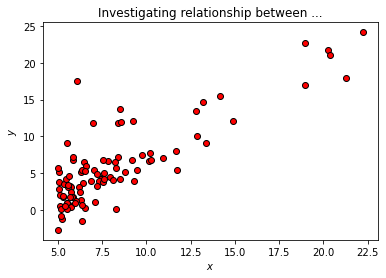

In [6]:
plot_data(data_df_1.values)

The scatter plot is quite messy and erratic however one could argue that there is somewhat of a positive linear relationship and we will investigate this hypothesis further.

#### Create full dataset

We see that there is a missing column of 1's at the start (which is usually in our $X$ array) and so we must add this in.

In [7]:
# Create column of 1's 
ones = np.ones((len(data_df_1)))
# Add column of 1's on the left to dataset/matrix
data_aug_df = pd.DataFrame(ones).join(data_df_1)
# Print dataframe
data_aug_df

,0,"Population of City in 10,000s","Profit in £10,000s"
0,1.0,6.1101,17.59200
1,1.0,5.5277,9.13020
2,1.0,8.5186,13.66200
3,1.0,7.0032,11.85400
4,1.0,5.8598,6.82330
...,...,...,...
92,1.0,5.8707,7.20290
93,1.0,5.3054,1.98690
94,1.0,8.2934,0.14454
95,1.0,13.3940,9.05510


#### Cost Function and Solution

Fantastic! Now we can create our Linear Regression cost function and the Normal Equations/Least Squares solution.

In [8]:
def LR_Cost(X, y, theta):
    
    """ Return the Mean Squared Error of a linear regression model. """
    
    # Retrieve feature dimensions
    m, n = X.shape 
    # Calculate error 
    residual = y - X @ theta
    # Calculate Cost Function 
    CF_LR = (1/m) * (residual.T @ residual)
    # Return Cost Function
    return CF_LR

In [9]:
def LS_NE(X, y):
    
    """ Return the maximum likelihood estimate (theta ML) from the normal equations 
    as this maximises the likelihood of the linear regression model. """
    
    # Calculate estimator theta
    theta_ML = np.linalg.solve((X.T @ X), X.T @ y)
    # Return estimates 
    return theta_ML

Lastly, we will also calculate our predictions and accuracies (the accuracies function is more tailored for classification problems).

In [10]:
def model_predict(X, theta_estimate):
    
    """ Return model predictions. """
    
    y_pred = X @ theta_estimate
    # Return predictions
    return y_pred

In [11]:
def model_acc(y_predict, y_target):
    
    """ Calculate accuracy and predictions. """
    
    # Return mean accuracy
    return np.float(sum(y_predict==y_target)) / float(len(y_target))

#### Machine Learning Model

We will now create our machine learning model to find our $\hat \theta$ estimates. We will then use this to calculate the MSE of our function.

In [52]:
# Separate features and target variable
X_data = data_aug_df.iloc[:,:2]
y_data = data_aug_df.iloc[:,2:]
# Calculate Least Squares solution (converting into numpy array)
theta_ML_1 = LS_NE(X_data.values, y_data.values)
# Calculate MSE on training and test dataset
MSE_data = LR_Cost(X_data.values,y_data.values,theta_ML_1)
print("Theta estimates are: {}".format(theta_ML_1))
print("Entire dataset mean squared error: {}".format(MSE_data))

Theta estimates are: [[-3.89578088]
 [ 1.19303364]]
Entire dataset mean squared error: [[8.95394275]]


Our test error is very low which suggests that ths linear regression model fits the data well. Our machine learning algorithm is a success! 

- Notice that these arrays are $2D$ - we can change them to $1D$ by using *.flatten($\cdot$)* on them (as this might make matrix multiplication easier later however it is not necessary as long as you keep the dimensions of the matrices compatible). 

In [13]:
# Given the estimates, calculate predictions and plot the predicted linear regression line
y_train_predict = model_predict(X_data.values, theta_ML)

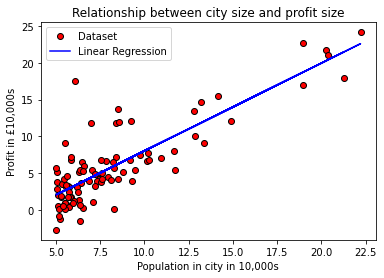

In [14]:
# Plot training data against predictive model
plt.xlabel('Population in city in 10,000s')
plt.ylabel('Profit in £10,000s')
plt.title('Relationship between city size and profit size')
plt.plot(data_df_1.values[:,0],data_df_1.values[:,1],'ro', mec= 'k');
plt.plot(data_df_1.values[:,0],y_train_predict,'-b', mec= 'k');
plt.legend(['Dataset', 'Linear Regression']);

To validate our hypothesis, let us look at the statistical in-built Pearson correlation coefficient.

In [15]:
data_df_1.corr()

,"Population of City in 10,000s","Profit in £10,000s"
"Population of City in 10,000s",1.000000,0.837873
"Profit in £10,000s",0.837873,1.000000


The correlation between the $X$ feature and $y$ outcome variable is approximately 0.84, which is very high and positive, indicating a strong positive linear relationship.

### Multi-Variate Linear Regression

We repeat the above procedure, but now use a dataset with more than 1 feature. 

In [16]:
# Load data 
data_df_2 = pd.read_csv('ex1data2.txt', header = None)
# Label columns
data_df_2.columns = ['Size (sq.ft)', 'Number of bedrooms {#}', 'House Price (£)']

In [17]:
# Check the data
data_df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Size (sq.ft)            47 non-null     int64
 1   Number of bedrooms {#}  47 non-null     int64
 2   House Price (£)         47 non-null     int64
dtypes: int64(3)
memory usage: 1.2 KB


In [18]:
# Look at data
data_df_2

,Size (sq.ft),Number of bedrooms {#},House Price (£)
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900
5,1985,4,299900
6,1534,3,314900
7,1427,3,198999
8,1380,3,212000
9,1494,3,242500


Our dataset does not have any missing or NaN values so we are good to proceed!

In [19]:
# Create column of 1's 
ones = np.ones((len(data_df_2),1))
# Add column of 1's on the left to dataset
data = pd.DataFrame(np.hstack((ones, data_df_2)))
# Create features and outcome/target variable
X_data = data.iloc[:,:3]
y_data = data.iloc[:,3:]
# Calculate Least Squares solution 
theta_ML = LS_NE(X_data.values, y_data.values)
print("Theta estimates are: {}".format(theta_ML))

Theta estimates are: [[89597.9095428 ]
 [  139.21067402]
 [-8738.01911233]]


Let us now predict a house price based on a given sq-ft and bedroom number...

In [20]:
# Estimate the price of a 1650 sq-ft, 3 br house
price_normal = np.dot(theta_ML.flatten(), np.array([1,1650, 3]))
print('Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): £{:.0f}'.format(price_normal))

Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): £293081


In [21]:
# Calculate MSE
MSE_train = LR_Cost(X_data.values, y_data.values, theta_ML)
print("Dataset mean squared error: {}".format(MSE_train))

Dataset mean squared error: [[4.0865601e+09]]


Our MSE is extremely high - this might suggest that using a linear regression algorithm is perhaps not best to model this dataset and should not be given to fellow house buyers or estate agenets. 
The reason why this is so high because our $y$ value is much higher in order than our features so even after feature scaling, the difference in magnitude between the predictions will still be high. 

# Feature Scaling (extra)

Feature scaling is a technique used in machine learning to rectify the differences in 'orders of magnitude' of our features in the dataset/matrix $X$. Essentially, to fit for parametric methods (usually regression), we'd like to have our dataset somewhat normally distributed. 

- By looking at the values, note that house sizes are about 1000 times the number of bedrooms. 
- We therefore perform feature scaling, noting that it is done before adding one's into the first column.

This should always be done for machine learning algorithms that do not provide **exact** solutions i.e. gradient descent techniques, estimators etc... As a result, we did not implement this before applying the normal equations solution as this solution takes care of the issue of 'magnitude' differences. 

In [22]:
def normalise(X):
    
    """ Normalises the features in X and returns a normalized version of X where
    the mean value of each feature is 0 and the standard deviation
    is 1. """
    
    # Normalise features to give equal weighting to each feature
    mu = X.mean(axis=0)
    sigma = X.std(axis=0)
    X_norm = (X - mu)/sigma
    # Return normalised data, mean and standard deviation
    return X_norm, mu, sigma

# Machine Learning Model Alternate Methods

In practice, we can solve this linear regression problem alternatively by using:
- Gradient Descent (Batch, Mini-Batch or Stochastic)
- Grid-Search

We can improve the model's performance by:
- Cross-Validation via data splits
- Find the sample mean of the MSE values over some $N$ intialisations/iterations and shuffle the dataset per iteration. 

These techniques can be applied for numerous tasks (and we will see this in unsupervised and deep learning). We introduce the code/knowledge for Batch gradient descent and Grid-search here so that you can use them later for complex tasks.

## Gradient Descent Algorithm (Batch)

Remind yourselves of the first datatset which was looking at the relationship between population size and profit in a city.

We also showed that the objective of linear regression is to minimize the cost function:

$$ J(\underline{\boldsymbol{\theta}}) = \frac{1}{m} \sum_{i=1}^m \left( f(\boldsymbol x^{i}, \underline{\boldsymbol \theta})  - y^{(i)}\right)^2$$

where the hypothesis $f(\boldsymbol x^{i}, \underline{\boldsymbol \theta}) = f_\theta(\boldsymbol x)$ is given by the linear model:

$$ f_\theta(\boldsymbol x) = \theta^T\underline{x} = \theta_0 + \theta_1 x_1$$

Recall that the parameters of your model are the $\theta_j$ values. These are
the values you will adjust to minimize cost $J(\theta)$. One way to do this is to
use the batch gradient descent algorithm. In batch gradient descent, each
iteration performs the update (using the **entire** dataset):

\begin{align}
\theta_j &= \theta_j - \alpha \nabla{J(\theta)} \qquad \text{general gradient descent update } \\
&= \theta_j - \frac{\alpha}{2m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{simultaneously update linear regression parameters } \theta_j \text{ for all } j
\end{align}

With each step of gradient descent, your parameters $\theta_j$ come closer to the optimal values $\hat \theta_j$ that will achieve the lowest cost $J (\theta)$.

<div class="alert alert-warning">
  <strong>Q: What type of optimsation problem is this?</strong>
</div>

In [23]:
def LR_Derivatives(X_aug, y, theta):
    
    """ Returns the gradient function of the model. """
    
    # Number of training examples
    m = X_aug.shape[0]
    # Calculate derivatives in matrix form
    dtheta = 1/(2*m) * ((X_aug @ theta) - y) @ X_aug
    # Return derivatives
    return dtheta

In [24]:
def LR_BGD(X_aug, y, theta, num_iterations=1000, learning_rate=0.005, print_cost=False):
    
    """ Perform Batch Gradient descent algorithm on model and return the theta estimates and costs
    over the iterations.
    """
    
    # Store costs
    costs = np.zeros((num_iterations))
    # Perform batch gradient descent
    for i in range(num_iterations):
    # Calculate cost and gradients 
        costs[i] = LR_Cost(X_aug, y, theta)
        dtheta = LR_Derivatives(X_aug, y, theta)
        # Updating procedure
        theta -= learning_rate*dtheta
    # Return estimates and costs
    print("Batch Gradient Descent algorithm complete! \n")
    return costs, theta

**Note:** The previous cells for the first dataset have to be run again to obtain the augmented $X$ feature matrix and corresponding $y$ outcome variable data.

Batch Gradient Descent algorithm complete! 

Theta estimates found by batch gradient descent: [-3.89529855  1.19298519]


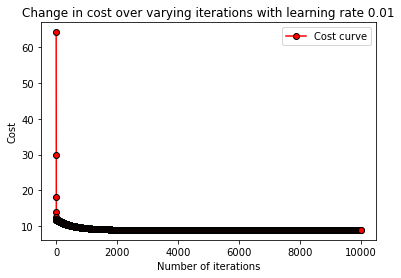

In [33]:
# Initialise starting theta values
theta = np.zeros(2)
# Initialise reasonable learning rate and choose number of iterations
learning_rate = 0.01
iterations = 10000
# Obtain first dataset input and target variables
X_BGD = data_aug_df.iloc[:,:2]
y_BGD = data_aug_df.iloc[:,2:]
# Peform Batch Gradient Descent algorithm
costs, theta_ML_2 = LR_BGD(X_BGD.values, y_BGD.values.flatten(), theta, num_iterations=10000
                  , learning_rate=0.01, print_cost=True)
# Plot cost curve (to check if algorithm is working)
plt.xlabel('Number of iterations')
plt.ylabel('Cost')
plt.title('Change in cost over varying iterations with learning rate {}'.format(learning_rate))
plt.plot(np.arange(iterations),costs,'-ro', mec= 'k')
plt.legend(['Cost curve']);
print('Theta estimates found by batch gradient descent: {}'.format(theta_ML_2))

<div class="alert alert-warning">
  <strong>Q: What happens with different learning rates?</strong>
</div>

## Grid Search

To understand the cost function $J(\underline{\theta})$ better, we will now plot the cost over a 2-dimensional grid of $\theta_0$ and $\theta_1$ values. This can provide us with much more accurate estimates, depending on the range of values we scan over and will also provide supporting evidence for previous techniques that we use to find our estimates. The downside to this technique however is that it can become computationally slow as the time complexity is $\approx O(n^2)$. 

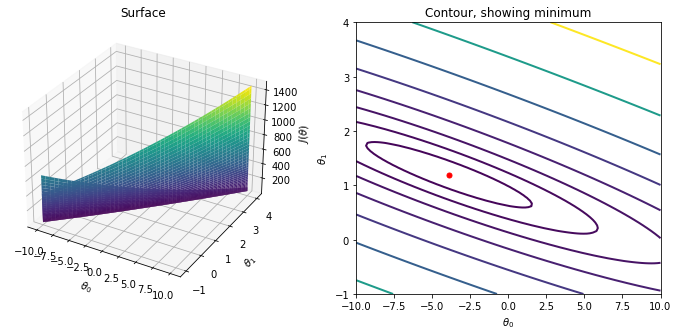

In [91]:
from mpl_toolkits.mplot3d import Axes3D 
# Grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)
# Initialize J_vals to a matrix of 0's
J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))
# Fill out J_vals via grid search
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        J_vals[i, j] = LR_Cost(X_BGD.values, y_BGD.values, [[theta0], [theta1]])     
# Transpose J_vals before calling surf, or else the axes will be flipped
J_vals = J_vals.T
# Surface plot
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis')
ax.set_xlabel(r'$\theta_{0}$')
ax.set_ylabel(r'$\theta_{1}$')
ax.set_zlabel(r'$J({\theta})$')
ax.set_title('Surface')
# Contour plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
ax = plt.subplot(122)
plt.contour(theta0_vals, theta1_vals, J_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))
plt.xlabel(r'$\theta_{0}$')
plt.ylabel(r'$\theta_{1}$')
plt.plot(theta_ML_1.flatten()[0], theta_ML_1.flatten()[1], 'ro', ms=5, lw=2)
plt.title('Contour, showing minimum');

# Summary

You have learned... 

Till next time 😃

&copy; *PolyNath 2021.*